In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
medals = pd.read_csv('medals_by_country_2016.csv',index_col=0)

# 1. Quantitative comparisons: bar-charts
In the previous chapter, you saw how you can turn data into visual descriptions. In this chapter, we will focus on quantitative comparisons between parts of the data.

2. Olympic medals
Let's look at a dataset that contains information about the number of medals won by a few countries in the 2016 Olympic Games. The data is not very large. Here is all of it. Although you can see all of it in front of you, it's not that easy to make comparisons between different countries and see which countries won which medals.

3. Olympic medals: visualizing the data
Let's start by reading the data in from a file. We tell Pandas to create a DataFrame from a file that contains the data and to use the first column, which contains the country names, as the index for the DataFrame. Next, we can visualize the data about gold medals. We create a Figure and an Axes object and call the Axes bar method to create a bar chart. This chart shows a bar for every row in the "Gold" column of the DataFrame, where the height of the bar represents the number in that row. The labels of the x-axis ticks correspond to the index of the DataFrame, which contains the names of the different countries in the data table. Unfortunately, these names are rather long, so they overlap with each other. Let's fix that first.

4. Interlude: rotate the tick labels
To fix these labels, we can rotate them by 90 degrees. This is done by using the set-underscore-xticklabels method of the Axes. We also take the opportunity to add a label on the y-axis, telling us that the height corresponds to the number of medals. This looks good. Visualizing the data in this way shows us which countries got a high or low number of gold medals, but also allows us to see the differences between countries, based on the difference in heights between the bars.

5. Olympic medals: visualizing the other medals
Next, we would like to add the data about the other medals: Silver and Bronze. To add this information into the same plot, we'll create a stacked bar chart. This means that each new data will be stacked on top of the previous data. It starts the same way as before. Next, we add another call to the bar method to add the data from the "Silver" column of the DataFrame. We add the bottom key-word argument to tell Matplotlib that the bottom of this column's data should be at the height of the previous column's data. We add the x-axis tick labels, rotating them by 90 degrees, set the y-axis labels, and call plt-dot-show.

6. Olympic medals: visualizing all three
Similarly, we can add in the number of Bronze medals, setting the bottom of this bar to be the sum of the number of gold medals and the number of silver medals.

7. Stacked bar chart
This is what the full stacked bar chart looks like.

8. Adding a legend
To make this figure easier to read and understand, we would also like to label which color corresponds to which medal. To do this we need to add two things.

9. Adding a legend
The first is to add the label key-word argument to each call of the bar method with the label for the bars plotted in this call. The second is to add a call to the Axes legend method before calling show. This adds in a legend that tells us which color stands for which medal.

10. Stacked bar chart with legend
This is what the figure looks like with the legend.

11. Create a bar chart!
Now, you try!

<ipython-input-4-36dd58421317>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation=90)


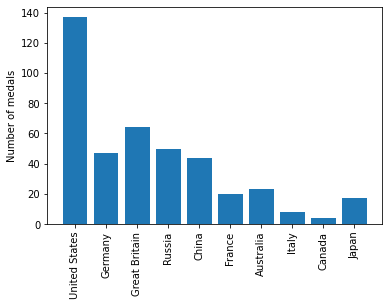

In [4]:
fig,ax=plt.subplots()
ax.bar(medals.index,medals['Gold'])
ax.set_xticklabels(medals.index,rotation=90)
ax.set_ylabel('Number of medals')

plt.show()

<ipython-input-5-3d4f60be5317>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation=90)


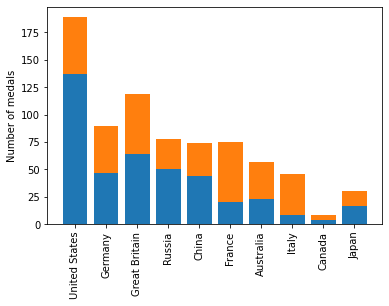

In [5]:
#creating the plot
fig,ax=plt.subplots()

#graphing gold
ax.bar(medals.index,medals['Gold'])

#graphing silver
ax.bar(medals.index,medals['Silver'],bottom=medals['Gold'])
ax.set_xticklabels(medals.index,rotation=90)
ax.set_ylabel('Number of medals')
plt.show()